In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

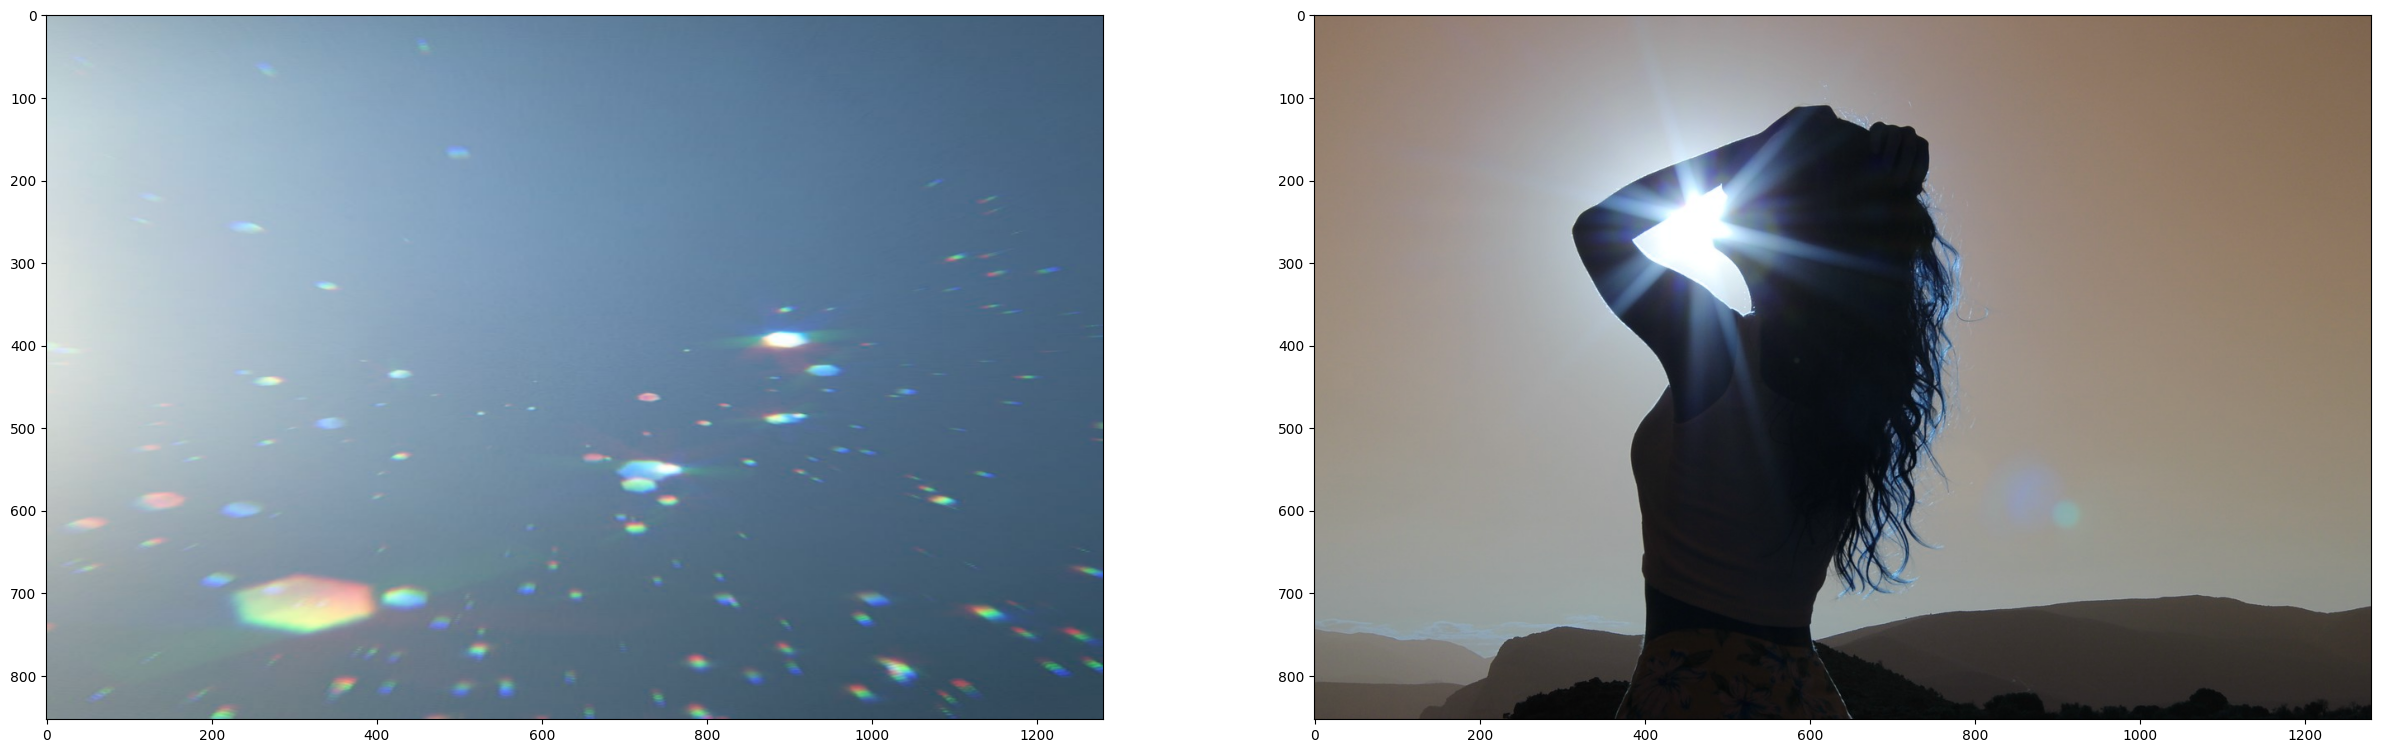

In [10]:
image1 = cv2.imread('Glitter.jpg')
image2 = cv2.imread('girl.jpg')
# Resize images to have the same dimensions
image1 = cv2.resize(image1, (image2.shape[1], image2.shape[0]))

# Display the images
fig, axs = plt.subplots(1, 2, figsize=(30, 30))
axs[0].imshow(image1)
axs[1].imshow(image2)

In [12]:
def generate_laplacian_pyramid(image, levels):
    pyramid = []
    for _ in range(levels):
       # Apply Gaussian blur to the image
        blurred = cv2.GaussianBlur(image, (5, 5), 0)
         # Calculate the Laplacian and append it to the pyramid list
        pyramid.append(image - blurred)
        image = cv2.pyrDown(blurred)#downsample the blurred image for the next level
    pyramid.append(image)#by append the highest resolution lel pyramid
    return pyramid

In [13]:
def reconstruct_from_pyramid(pyramid):
    image = pyramid[-1]
    # Iterate through the pyramid levels in reverse order
    for level in range(len(pyramid) - 2, -1, -1):
      # Upsample the image to the next level
        image = cv2.pyrUp(image)
        image += pyramid[level]# Add the corresponding level of the pyramid to the upsampled image
    return image

In [18]:
def blend_images_with_laplacian_pyramid_beta(image1, image2, beta, levels):
    #Laplacian pyramids for both images
    pyramid1 = generate_laplacian_pyramid(image1, levels)
    pyramid2 = generate_laplacian_pyramid(image2, levels)

    # Print shapes
    print("Pyramid 1 length:", len(pyramid1))
    print("Pyramid 2 length:", len(pyramid2))

    # Display the Laplacian pyramids
    plt.figure(figsize=(15, 10))
    for i in range(levels):#iterates over each level from 0 to levels - 1
    #  Display the levels of the Laplacian pyramid for image1
        plt.subplot(3, levels, i + 1)
        plt.imshow(pyramid1[i]/255, cmap='gray')  # Normalize pixel values to [0, 1]
        plt.title("Pyramid 1 Level {}".format(i + 1))  # The first row displays the levels of the Laplacian pyramid for image1.
 # Display the levels of the Laplacian pyramid for image2
        plt.subplot(3, levels, i + 1 + levels)
        plt.imshow(pyramid2[i]/255, cmap='gray')  # Normalize pixel values to [0, 1]
        plt.title("Pyramid 2 Level {}".format(i + 1))  # The second row displays the levels of the Laplacian pyramid for image2.

        # Blend the images at each level using beta blending
        blended_level = beta * pyramid1[i] + (1 - beta) * pyramid2[i]
        plt.subplot(3, levels, i + 1 + 2 * levels)
        plt.imshow(blended_level/255, cmap='gray')  # Normalize pixel values to [0, 1]
        plt.title("Blended Level {}".format(i + 1))  # The third row displays the levels of the blended image.

    plt.show()
#the beta is the blending parameter

Pyramid 1 length: 7
Pyramid 2 length: 7


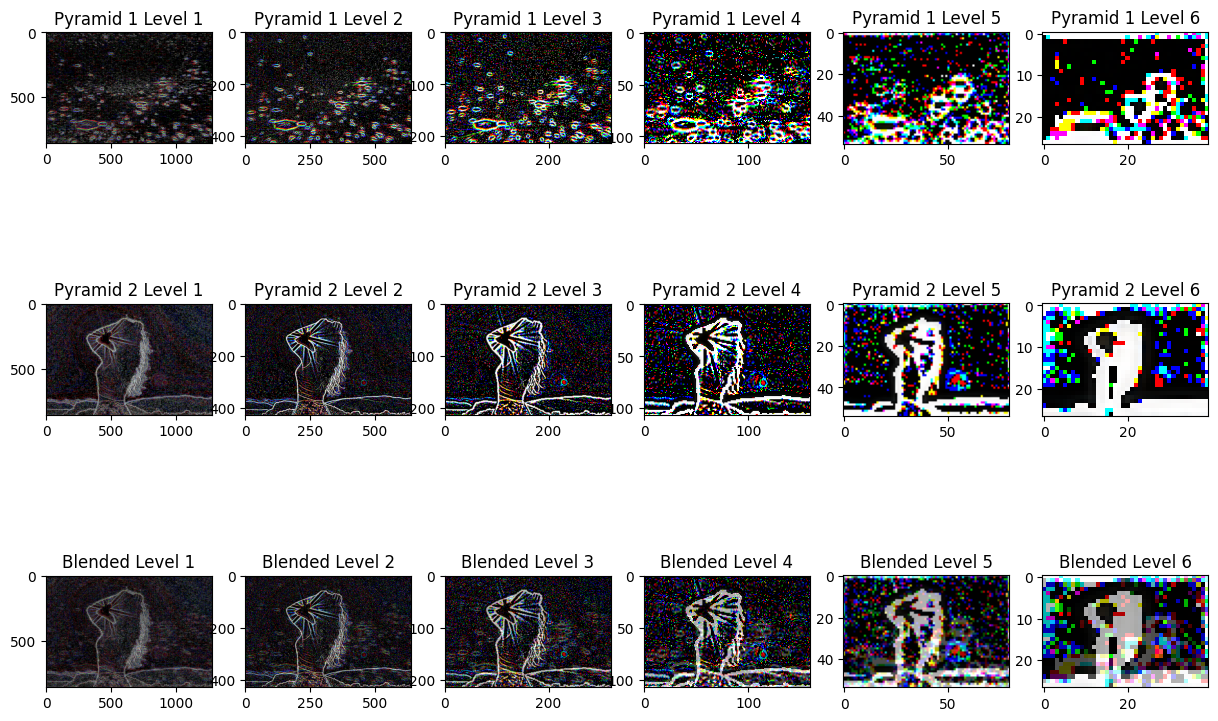

In [19]:
blend_images_with_laplacian_pyramid_beta(image1, image2, beta=0.3, levels=6)



In [21]:
beta_values = [0.1, 0.5, 0.9]
for levels in [2,4,6]:
    print("Levels:", levels)
    for beta in beta_values:  # Iterate over different beta values
        print("beta:", beta)
        blend_images_with_laplacian_pyramid_beta(image1, image2, beta, levels)


Output hidden; open in https://colab.research.google.com to view.